
# Capstone Project: Customer Segmentation for Retail Marketing Strategy

## Project Overview
The goal of this project is to enhance the marketing strategy of a retail company by segmenting customers based on their purchasing behavior. The objective is to identify distinct customer groups, which can then be targeted with tailored promotions and product offerings, ultimately increasing customer satisfaction and driving sales growth.

### Problem Statement:
How can we identify distinct customer groups based on their purchasing behavior to tailor marketing strategies and improve sales?

## Data Used
The dataset used for this analysis is a transaction dataset from a retail store, which includes various attributes such as:
- **Customer Demographics**: Age, Gender, Customer Type (Member or Normal)
- **Transaction Details**: Product line, Quantity, Unit price, Total value, Payment method, Date, and Time of purchase
- **Customer Feedback**: Rating provided by the customer

For this exercise, the publicly available data, Supermarket Sales data from Kaggle was used.  https://www.kaggle.com/datasets/markmedhat/supermarket-sales

### Key Variables:
- **Invoice ID**: Unique transaction identifier
- **Branch**: Location of the store
- **City**: The city where the transaction occurred
- **Total**: Total transaction value
- **Quantity**: Number of items purchased
- **Rating**: Customer rating for the transaction
- **Payment**: Payment method used (Cash, Credit card, Ewallet)
- **Product Line**: Type of product purchased


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
    

In [2]:

# Load the dataset to inspect its contents
file_path = 'data/supermarket_sales.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()
    

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:

# Check for missing values
missing_data = data.isnull().sum()

# Check for data types and basic info
data_info = data.info()

# Summary statistics of numerical features
summary_stats = data.describe()

# Check for duplicates
duplicates = data.duplicated().sum()

# Convert 'Date' and 'Time' to appropriate datetime types
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time

# Clean any unnecessary spaces in column names
data.columns = data.columns.str.strip()

# Display initial insights
missing_data, data_info, summary_stats, duplicates
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

(Invoice ID                 0
 Branch                     0
 City                       0
 Customer type              0
 Gender                     0
 Product line               0
 Unit price                 0
 Quantity                   0
 Tax 5%                     0
 Total                      0
 Date                       0
 Time                       0
 Payment                    0
 cogs                       0
 gross margin percentage    0
 gross income               0
 Rating                     0
 dtype: int64,
 None,
         Unit price     Quantity       Tax 5%        Total        cogs   
 count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  \
 mean     55.672130     5.510000    15.379369   322.966749   307.58738   
 std      26.494628     2.923431    11.708825   245.885335   234.17651   
 min      10.080000     1.000000     0.508500    10.678500    10.17000   
 25%      32.875000     3.000000     5.924875   124.422375   118.49750   
 50%      55.230000     

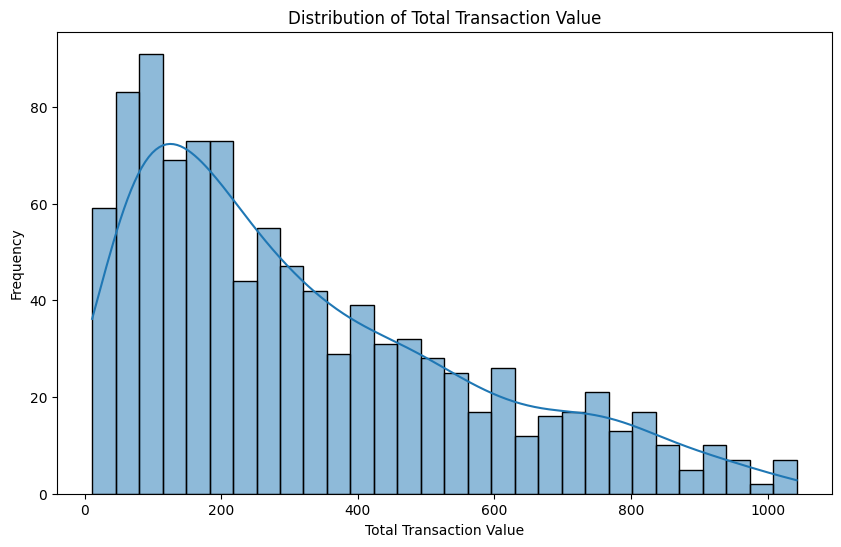

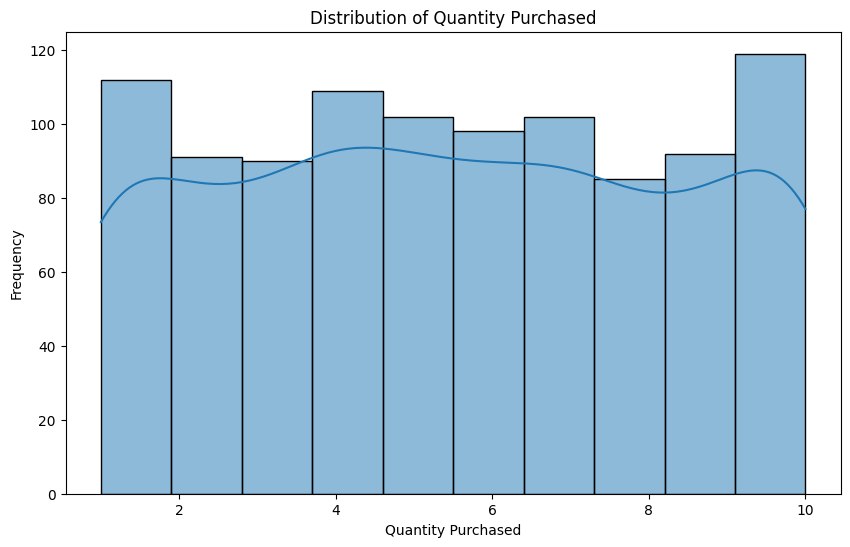

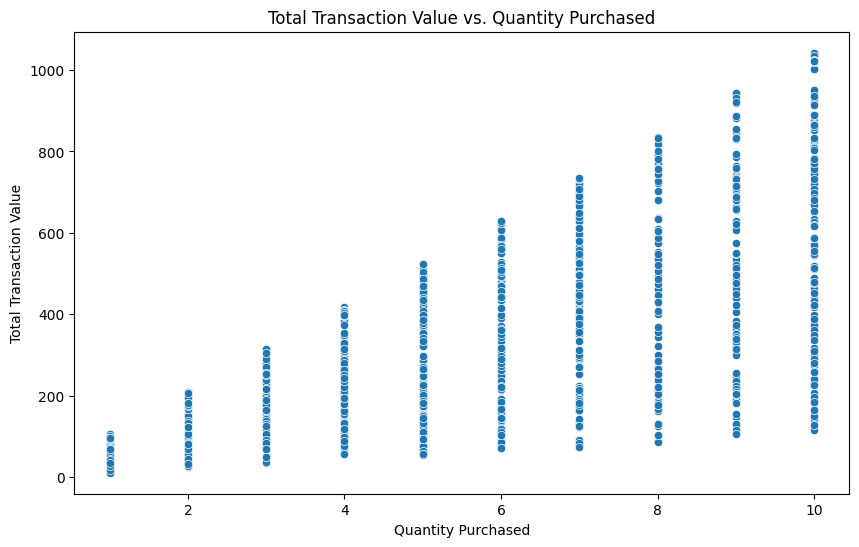

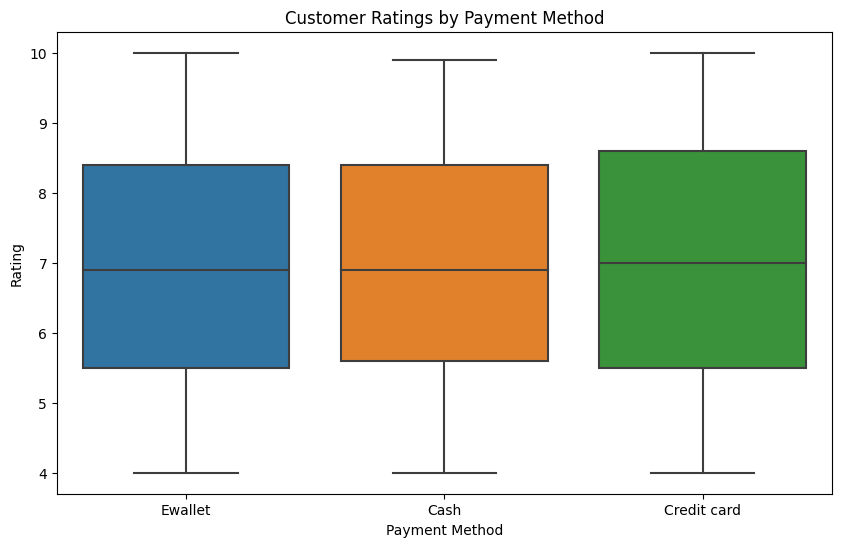

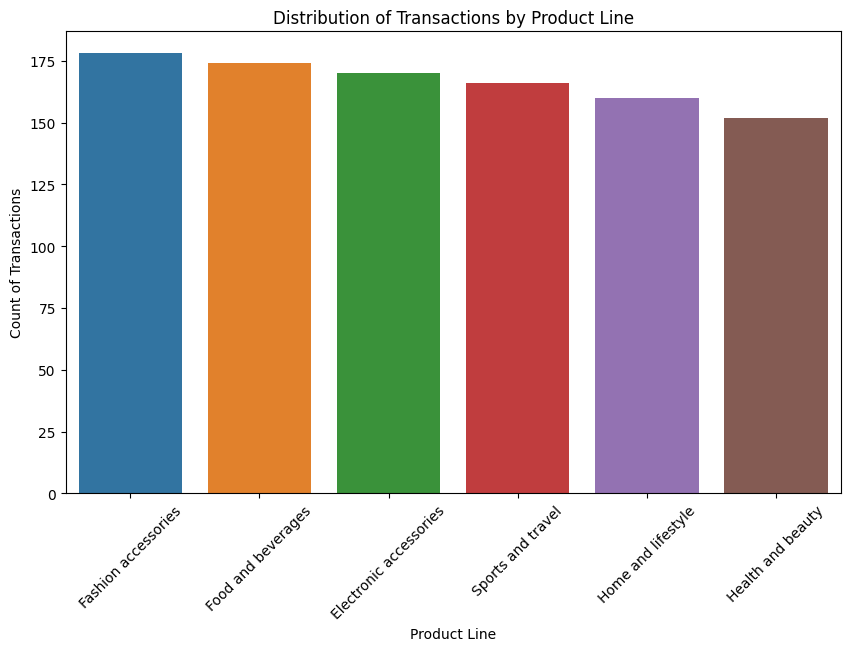

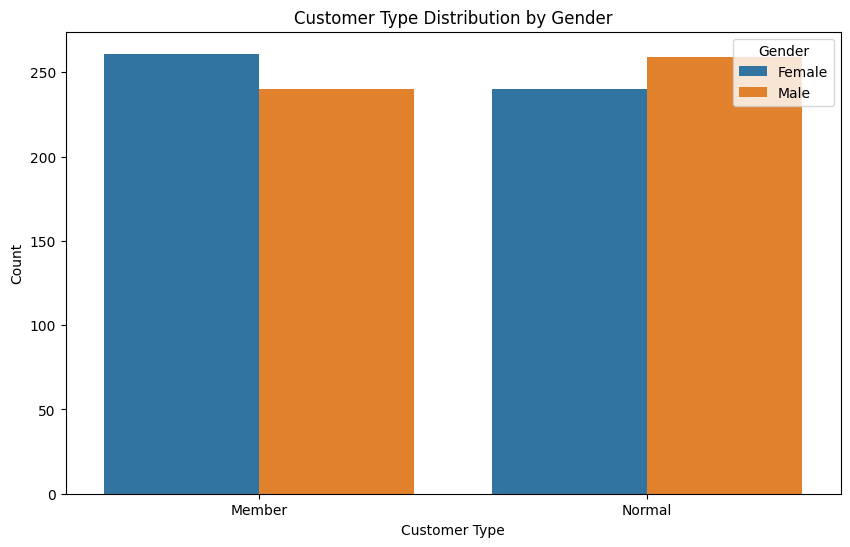

In [4]:

# Visualizations

# Distribution of Total Transaction Value
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], kde=True, bins=30)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Transaction Value')
plt.ylabel('Frequency')
plt.show()

# Distribution of Quantity Purchased
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], kde=True, bins=10)
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity Purchased')
plt.ylabel('Frequency')
plt.show()

# Transaction Total vs. Quantity (Exploring purchasing behavior)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total', data=data)
plt.title('Total Transaction Value vs. Quantity Purchased')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Transaction Value')
plt.show()

# Customer Ratings by Payment Method
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment', y='Rating', data=data)
plt.title('Customer Ratings by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Rating')
plt.show()

# Distribution of Transactions by Product Line
plt.figure(figsize=(10, 6))
sns.countplot(x='Product line', data=data, order=data['Product line'].value_counts().index)
plt.title('Distribution of Transactions by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=45)
plt.show()

# Customer Type distribution by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer type', hue='Gender', data=data)
plt.title('Customer Type Distribution by Gender')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()
    

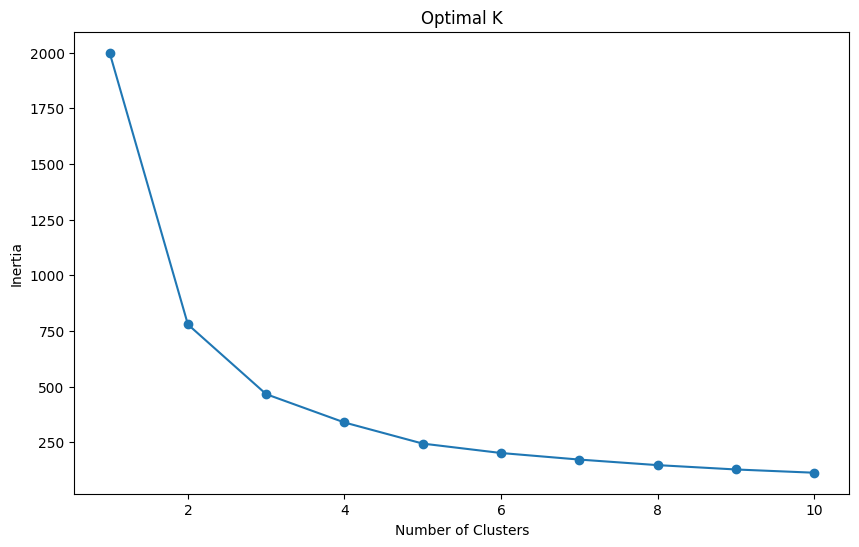

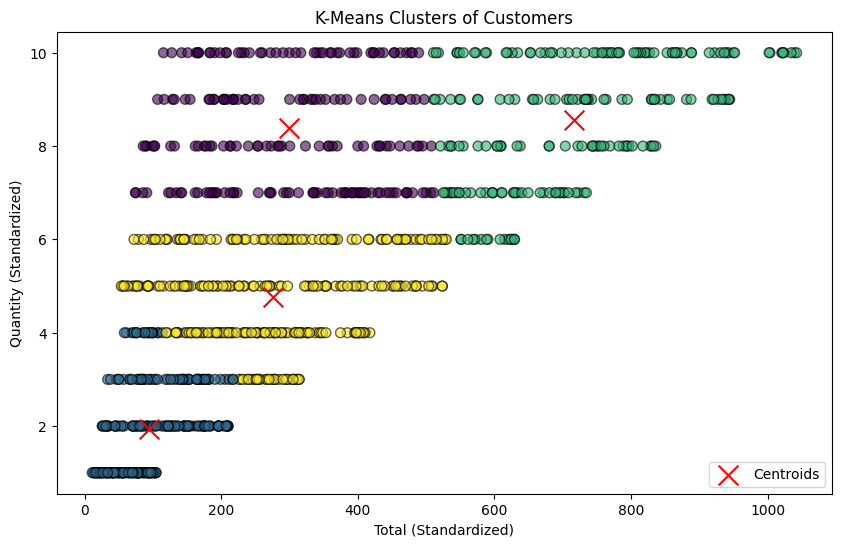

In [5]:

# Feature selection for clustering (using Total and Quantity)
features = data[['Total', 'Quantity']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to determine the optimal number of clusters for K-means
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init = 10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, let's try K=4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init = 10)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Silhouette score to evaluate the clustering quality
sil_score = silhouette_score(scaled_features, data['KMeans_Cluster'])
sil_score

# Retrieve cluster centers from the fitted KMeans model
cluster_centers = kmeans.cluster_centers_

# Uncomment this to de-scale for graph
cluster_centers = scaler.inverse_transform(cluster_centers)
scaled_features = scaler.inverse_transform(scaled_features)

# Create a scatter plot of the data points, colored by their cluster label
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1],
            c=data['KMeans_Cluster'], cmap='viridis', 
            alpha=0.6, edgecolor='k', s=50)

# Plot the cluster centers as red "x" markers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='x', color='red', s=200, label='Centroids')

plt.title('K-Means Clusters of Customers')
plt.xlabel('Total (Standardized)')
plt.ylabel('Quantity (Standardized)')
plt.legend()
plt.show()
    

# Based on graph, there are 4 possible clusters:
# 1. Low item count; Low priced items - note, probably price sensitive customers
# 2. Moderate item count (4-6); Moderately priced items - note, let's call these smart buyers
# 3. High item count (8-10); Moderately priced items - note, probably bulk buyers
# 4. High item count; High priced items - note, big spenders

Based on graph, there are 4 possible clusters as indicated by the 4 centroids (X):
1. Price sensitive customers - These are customers with low item count and low priced items 
2. Value Shoppers - These are customers with moderate item count (4-6) and moderately priced items 
3. Bulk Buyers - These are customers with high item count (8-10) with moderately priced items 
4. Hight Ticket/High Quantity Buyers (HTHQ) - These are customers with high item count and high priced items - note, big spenders

Marketing campaigns could then be tailor fit to these different customer clusters.

Cluster centroids (continuous features, categorical features):
[['1.6162344973349265' '1.0625145790879695' 'Female' 'Sports and travel']
 ['-0.005406308331156916' '0.8639664479795602' 'Male'
  'Electronic accessories']
 ['-0.8930407360485619' '-1.1766321829496684' 'Male'
  'Fashion accessories']
 ['-0.255741378209045' '-0.27556866133943864' 'Female'
  'Food and beverages']]


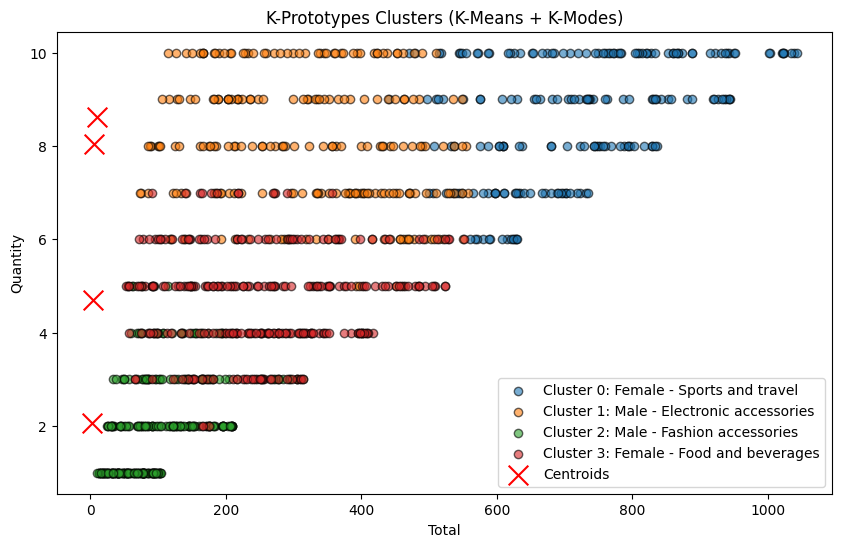

In [21]:
# !pip install kmodes

# Import necessary libraries
from kmodes.kprototypes import KPrototypes
# 1. Standardize the continuous features
continuous_features = ['Total', 'Quantity']
scaler = StandardScaler()
data['Total_scaled'] = scaler.fit_transform(data[['Total']])
data['Quantity_scaled'] = scaler.fit_transform(data[['Quantity']])

# 2. Extract continuous features as a NumPy array and ensure they are floats
X_cont = data[['Total_scaled', 'Quantity_scaled']].to_numpy().astype(float)

# 3. Extract categorical features and ensure they are strings
categorical_features = ['Gender', 'Product line']
X_cat = data[categorical_features].to_numpy().astype(str)

# 4. Combine continuous and categorical features using np.column_stack 
# (continuous features come first)
X = np.column_stack((X_cont, X_cat))

# 5. Define indices for the categorical columns in the combined array
cat_cols_idx = list(range(X_cont.shape[1], X.shape[1]))

# 6. Fit the K-Prototypes model
n_clusters = 4
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', random_state=42, n_init=10)
clusters = kproto.fit_predict(X, categorical=cat_cols_idx)
data['KProto_Cluster'] = clusters

# 7. Print the cluster centroids to inspect their structure
print("Cluster centroids (continuous features, categorical features):")
print(kproto.cluster_centroids_)

# Convert the centroids to a 2D array
all_centroids = np.array(kproto.cluster_centroids_)

# 8. Extract only the continuous centroids (first two columns) and reverse the scaling
continuous_centroids_scaled = all_centroids[:, :2].astype(float)
continuous_centroids = scaler.inverse_transform(continuous_centroids_scaled)

# 9. Create a description for each cluster based on the categorical features (columns 2 and 3)
cluster_descriptions = {}
for i in range(n_clusters):
    gender = all_centroids[i, 2]
    product_line = all_centroids[i, 3]
    cluster_descriptions[i] = f"{gender} - {product_line}"

# 10. Plot the clusters using the original continuous feature values
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_mask = data['KProto_Cluster'] == cluster
    plt.scatter(
        data.loc[cluster_mask, 'Total'], 
        data.loc[cluster_mask, 'Quantity'], 
        label=f"Cluster {cluster}: {cluster_descriptions[cluster]}",
        alpha=0.6, edgecolor='k'
    )

# Plot the centroids on top as red 'x' markers
plt.scatter(continuous_centroids[:, 0], continuous_centroids[:, 1],
            marker='x', color='red', s=200, label='Centroids')

plt.title('K-Prototypes Clusters (K-Means + K-Modes)')
plt.xlabel('Total')
plt.ylabel('Quantity')
plt.legend()
plt.show()

This code groups customers into clusters based on how much they spend, how many items they buy, their gender, and the product line they prefer. It does this by first adjusting the spending and quantity numbers so they're easier to compare, then it mixes in the gender and product line information. Next, it uses a clustering method that can handle both numbers and words to sort the customers into four groups. Finally, it creates a simple label for each group using the gender and product line information and shows a plot where each group is marked along with its center point.

In addition to the inital 4 clusters identified, more targeted clusters are identified based on gender and product line:

1) Female - Sports and Travel
2) Male - Electronic Accessories
3) Male - Fashion Accessories
4) Female - Food and Beverages

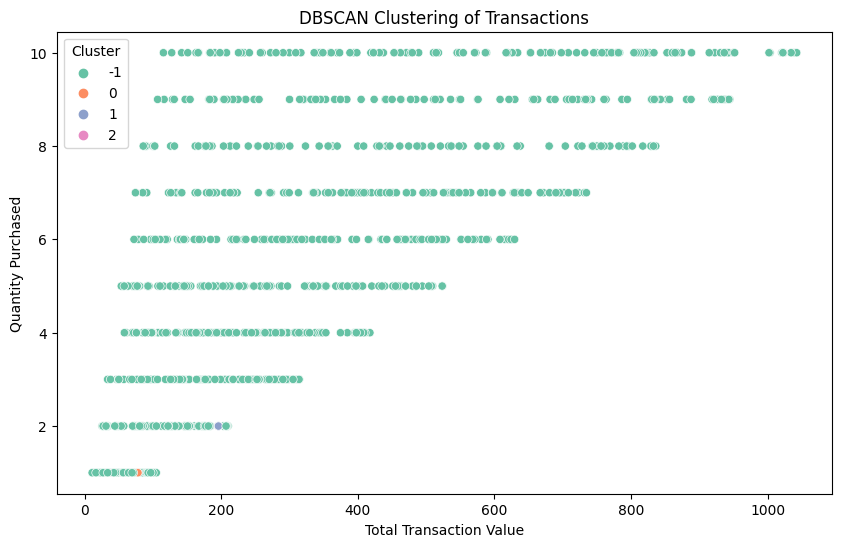

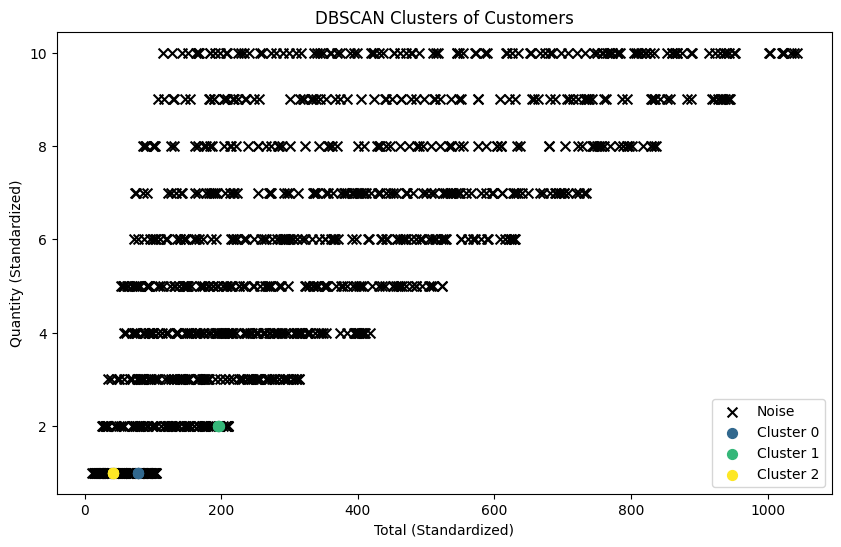

In [23]:

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Plot DBSCAN results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Quantity', hue='DBSCAN_Cluster', data=data, palette='Set2', marker='o')
plt.title('DBSCAN Clustering of Transactions')
plt.xlabel('Total Transaction Value')
plt.ylabel('Quantity Purchased')
plt.legend(title='Cluster')
plt.show()

# Evaluate the number of outliers (-1 indicates noise in DBSCAN)
outliers_count = (data['DBSCAN_Cluster'] == -1).sum()
outliers_count

# Visualize the different clusters
unique_labels = np.unique(data['DBSCAN_Cluster'])

# Create a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 6))

for label, color in zip(unique_labels, colors):
    # Create a mask for points belonging to the current cluster
    mask = (data['DBSCAN_Cluster'] == label)
    # Choose a special marker/color for noise if present
    if label == -1:
        plt.scatter(scaled_features[mask, 0], scaled_features[mask, 1],
                    c='k', marker='x', s=50, label='Noise')
    else:
        plt.scatter(scaled_features[mask, 0], scaled_features[mask, 1],
                    c=[color], marker='o', s=50, label=f'Cluster {label}')

plt.title('DBSCAN Clusters of Customers')
plt.xlabel('Total (Standardized)')
plt.ylabel('Quantity (Standardized)')
plt.legend()
plt.show()